In [1]:
import pandas as pd
import numpy as np

# Define column names based on your dataset description
column_names = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2',
                'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
                'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7',
                'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11',
                'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15',
                'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19',
                'sensor_measurement_20', 'sensor_measurement_21', 'sensor_measurement_22', 'sensor_measurement_23']

# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/train_FD001.txt', sep=" ", header=None)
train_df.columns = column_names

test_df = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/test_FD001.txt', sep=" ", header=None)
test_df.columns = column_names

rul_df = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/RUL_FD001.txt', sep=" ", header=None)
rul_df.columns = ['remaining_useful_life','unwanted']


train_df.head()



,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [2]:
# drop all-null columns
train_df.drop(["sensor_measurement_22","sensor_measurement_23"], axis=1, inplace=True)
test_df.drop(["sensor_measurement_22","sensor_measurement_23"], axis=1, inplace=True)

# rul_test is ordered by unit, we can infer unit from that
rul_df.drop(["unwanted"], axis=1, errors='ignore', inplace=True)
rul_df['unit'] = rul_df.index+1

In [3]:
train_df.describe()


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


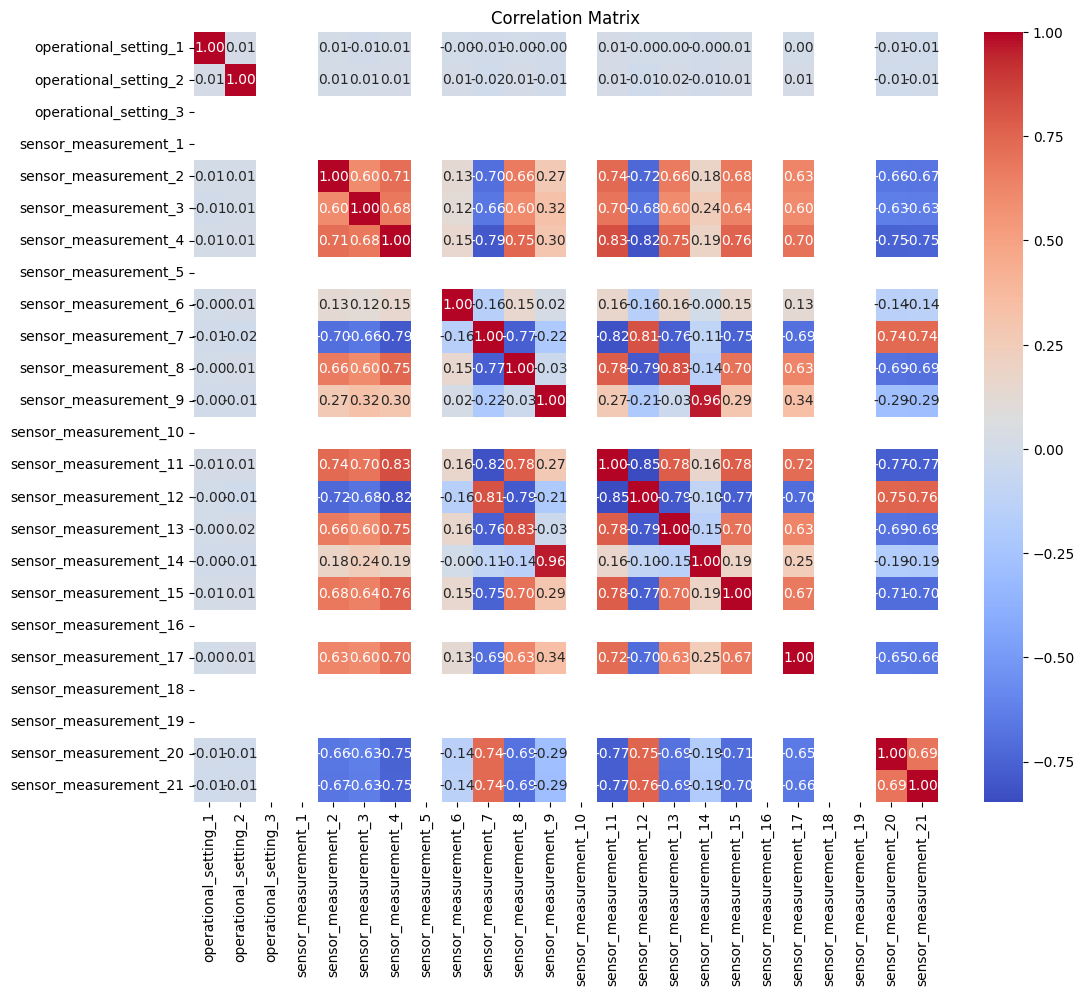

In [4]:
# Correlation matrix of the training data
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_df.iloc[:, 2:].corr()  # Exclude 'unit_number' and 'time_in_cycles' from correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])  # This will print columns with missing values, if any


Series([], dtype: int64)


In [6]:
# Add rolling mean and rolling standard deviation for sensors with high variation
sensors_to_analyze = ['sensor_measurement_7', 'sensor_measurement_11', 'sensor_measurement_15']  # Example sensors
window_size = 5  # Window size for the rolling statistics

for sensor in sensors_to_analyze:
    train_df[f'{sensor}_rolling_mean'] = train_df.groupby('unit_number')[sensor].rolling(window=window_size).mean().reset_index(level=0, drop=True)
    train_df[f'{sensor}_rolling_std'] = train_df.groupby('unit_number')[sensor].rolling(window=window_size).std().reset_index(level=0, drop=True)

# Show the updated DataFrame with new features
print(train_df.loc[train_df['unit_number'] == 1].head(10))  # Display data for the first engine unit


   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   
5            1               6                -0.0043                -0.0001   
6            1               7                 0.0010                 0.0001   
7            1               8                -0.0034                 0.0003   
8            1               9                 0.0008                 0.0001   
9            1              10                -0.0033                 0.0001   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                518.67 

In [7]:
# Calculate Time to Failure (TTF) for each engine cycle
train_df['TTF'] = train_df.groupby('unit_number')['time_in_cycles'].transform(max) - train_df['time_in_cycles']
print(train_df[['unit_number', 'time_in_cycles', 'TTF']].head())


   unit_number  time_in_cycles  TTF
0            1               1  191
1            1               2  190
2            1               3  189
3            1               4  188
4            1               5  187


In [8]:
from sklearn.preprocessing import StandardScaler

# Select features to scale: operational settings and sensor measurements
features_to_scale = train_df.columns[2:-1]  # exclude 'unit_number', 'time_in_cycles', and 'TTF'

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])

# Check the scaled features
print(train_df[features_to_scale].head())


   operational_setting_1  operational_setting_2  operational_setting_3  \
0              -0.315980              -1.372953                    0.0   
1               0.872722              -1.031720                    0.0   
2              -1.961874               1.015677                    0.0   
3               0.324090              -0.008022                    0.0   
4              -0.864611              -0.690488                    0.0   

   sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  \
0                   0.0             -1.721725             -0.134255   
1                   0.0             -1.061780              0.211528   
2                   0.0             -0.661813             -0.413166   
3                   0.0             -0.661813             -1.261314   
4                   0.0             -0.621816             -1.251528   

   sensor_measurement_4  sensor_measurement_5  sensor_measurement_6  \
0             -0.925936         -1.776357e-15            

In [9]:
# Fill NaN values using forward fill within each group of unit numbers
train_df.fillna(method='ffill', inplace=True)
train_df.fillna(method='bfill', inplace=True)  # Backfill if the first row has NaN

# Check if there are any remaining NaNs
print(train_df.isnull().sum().sum(), "NaNs remaining in the dataset")


0 NaNs remaining in the dataset


In [10]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = train_df[features_to_scale]
y = train_df['TTF']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the training and validation sets
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Validation Set Size: {X_val.shape[0]} samples")


Training Set Size: 16504 samples
Validation Set Size: 4127 samples


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error on Validation Set: {mse}")
print(f"R² Score on Validation Set: {r2}")

Mean Squared Error on Validation Set: 1507.210173976254
R² Score on Validation Set: 0.6701077345672924


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Re-split the dataset after filling NaNs
X = train_df[features_to_scale]
y = train_df['TTF']

# Split the dataset into training and validation sets again
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize and train the Random Forest Regressor
rf_model.fit(X_train, y_train)

# Predict on the validation set and evaluate the model again
y_val_pred = rf_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"After handling NaNs - Mean Squared Error on Validation Set: {mse}")
print(f"After handling NaNs - R² Score on Validation Set: {r2}")


After handling NaNs - Mean Squared Error on Validation Set: 1507.210173976254
After handling NaNs - R² Score on Validation Set: 0.6701077345672924


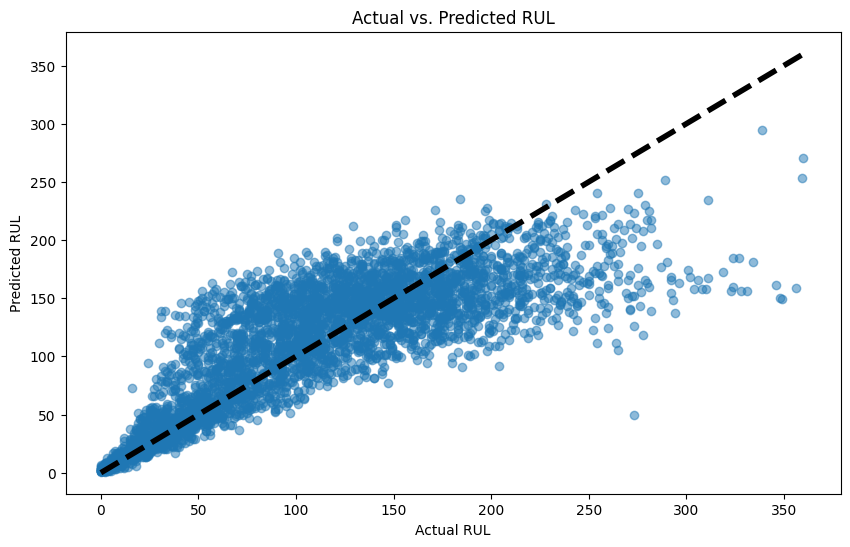

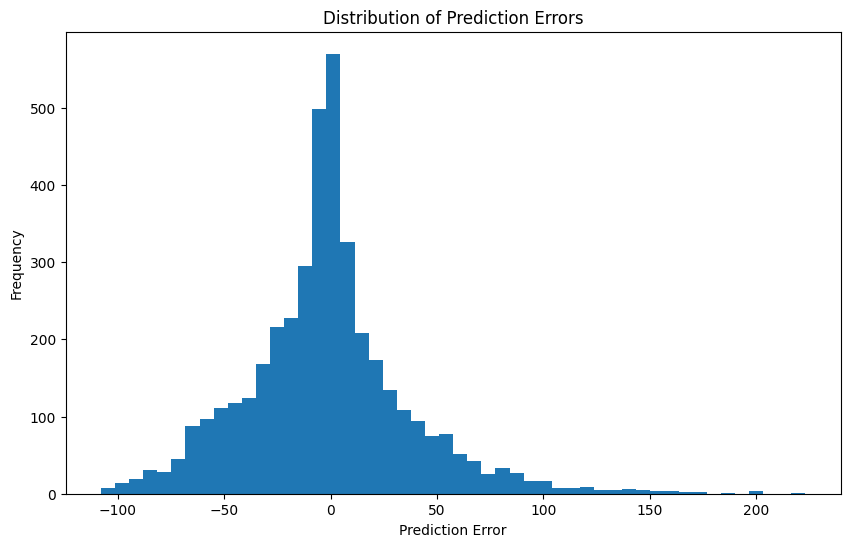

In [13]:
import matplotlib.pyplot as plt

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

# Plot actual vs predicted RUL
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.title('Actual vs. Predicted RUL')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Draw a diagonal line where actual = predicted
plt.show()

# Error distribution
plt.figure(figsize=(10, 6))
errors = y_val - y_val_pred
plt.hist(errors, bins=50)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


**Advanced Feature Engineering – Health Indicator**
A common technique in predictive maintenance is to construct a 'health indicator' (HI) from the sensor data, which ideally captures the degradation or health state of the engine over time. This indicator can be derived from principal component analysis (PCA) of several sensor readings that contribute most to the variance and show clear trends as the engine degrades.

Constructing the Health Indicator

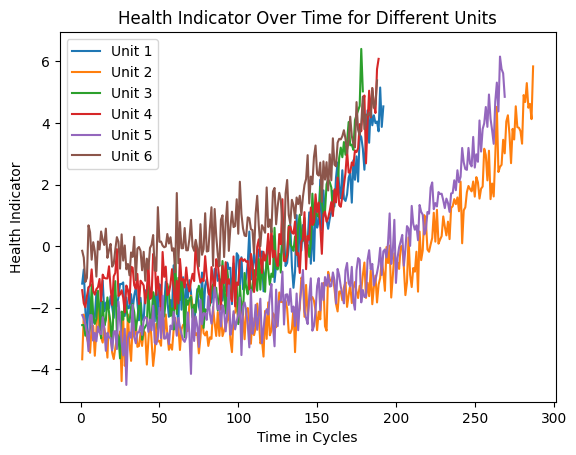

In [14]:
from sklearn.decomposition import PCA

# Select sensors that show significant changes during the operational period
selected_sensors = ['sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_11', 'sensor_measurement_15','sensor_measurement_17','sensor_measurement_19']
sensor_data = train_df[selected_sensors]

# Normalize these sensors
scaler = StandardScaler()
scaled_sensor_data = scaler.fit_transform(sensor_data)

# Apply PCA to reduce these sensors to 1 principal component
pca = PCA(n_components=1)
train_df['health_indicator'] = pca.fit_transform(scaled_sensor_data)

# Plot the health indicator for a few units to visualize
import matplotlib.pyplot as plt
for unit in [1, 2, 3, 4, 5, 6]:
    plt.plot(train_df[train_df['unit_number'] == unit]['time_in_cycles'], train_df[train_df['unit_number'] == unit]['health_indicator'], label=f'Unit {unit}')
plt.xlabel('Time in Cycles')
plt.ylabel('Health Indicator')
plt.title('Health Indicator Over Time for Different Units')
plt.legend()
plt.show()


**Time-Series Forecasting Model – LSTM**

Given the sequential nature of the data, an LSTM (Long Short-Term Memory) network can be very effective. LSTMs are designed to handle sequence prediction problems and can capture long-term dependencies in time-series data.

Building and Training the LSTM Model:

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Prepare data for LSTM
# Assuming 'health_indicator' and 'TTF' are already scaled and appropriate for input
feature_cols = ['health_indicator']
target_col = 'TTF'

# Reshape data for LSTM [samples, time steps, features]
train_X = np.array(train_df[feature_cols]).reshape((train_df.shape[0], 1, len(feature_cols)))
train_y = np.array(train_df[target_col])

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=2)

# Evaluate the model
# This would involve predicting on a similar validation set prepared earlier


Epoch 1/50
645/645 - 4s - loss: 14297.0625 - 4s/epoch - 6ms/step
Epoch 2/50
645/645 - 2s - loss: 8919.4619 - 2s/epoch - 2ms/step
Epoch 3/50
645/645 - 1s - loss: 5513.3447 - 1s/epoch - 2ms/step
Epoch 4/50
645/645 - 2s - loss: 3709.4182 - 2s/epoch - 3ms/step
Epoch 5/50
645/645 - 2s - loss: 2891.1096 - 2s/epoch - 3ms/step
Epoch 6/50
645/645 - 2s - loss: 2533.4038 - 2s/epoch - 3ms/step
Epoch 7/50
645/645 - 2s - loss: 2373.3315 - 2s/epoch - 2ms/step
Epoch 8/50
645/645 - 2s - loss: 2299.3250 - 2s/epoch - 2ms/step
Epoch 9/50
645/645 - 1s - loss: 2261.8181 - 1s/epoch - 2ms/step
Epoch 10/50
645/645 - 1s - loss: 2237.8813 - 1s/epoch - 2ms/step
Epoch 11/50
645/645 - 2s - loss: 2219.4260 - 2s/epoch - 2ms/step
Epoch 12/50
645/645 - 2s - loss: 2204.2773 - 2s/epoch - 2ms/step
Epoch 13/50
645/645 - 2s - loss: 2191.0264 - 2s/epoch - 3ms/step
Epoch 14/50
645/645 - 2s - loss: 2180.8103 - 2s/epoch - 3ms/step
Epoch 15/50
645/645 - 2s - loss: 2173.3521 - 2s/epoch - 2ms/step
Epoch 16/50
645/645 - 1s - loss: 

In [17]:
# Assuming X_val and y_val are predefined as part of your dataset split
# Scale the validation features using the same scaler fitted on the training data
X_val_scaled = scaler.transform(X_val[selected_sensors])

# Apply PCA transformation using the PCA fitted on the training data
X_val['health_indicator'] = pca.transform(X_val_scaled)

# Reshape data for LSTM input (like the training data)
X_val_reshaped = np.array(X_val['health_indicator']).reshape(-1, 1, 1)


In [18]:
# Predict the Remaining Useful Life (RUL) on the validation set
y_val_predicted = model.predict(X_val_reshaped)
y_val_predicted = y_val_predicted.flatten()  # Flatten the predictions if necessary


129/129 [==============================] - 1s 3ms/step


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the Mean Absolute Error and Mean Squared Error
mae = mean_absolute_error(y_val, y_val_predicted)
mse = mean_squared_error(y_val, y_val_predicted)

print(f'Mean Absolute Error on Validation Set: {mae}')
print(f'Mean Squared Error on Validation Set: {mse}')


Mean Absolute Error on Validation Set: 34.30754209162682
Mean Squared Error on Validation Set: 2082.750090264299


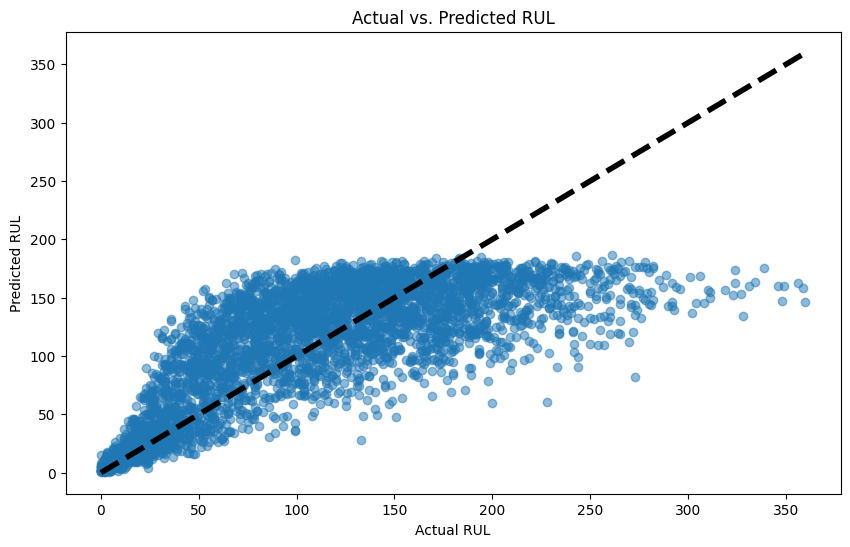

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_predicted, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted RUL')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.show()


**Construct the Health Indicator**

This step involves using PCA to distill key signals from multiple relevant sensors into a single composite metric (Health Indicator) that represents the operational health of the engine.

Data Preparation:
Normalize the selected sensor readings and apply PCA to derive the Health Indicator.

PCA Implementation:
Use scikit-learn's PCA to reduce dimensionality and extract the principal component that you will use as the health indicator.

Building and Training the LSTM Model
Next, we'll use Keras to construct an LSTM network that learns from the sequence of Health Indicator values to predict the Remaining Useful Life (RUL) of each engine.

Data Reshaping:
LSTM models expect input data in the form of [samples, time steps, features]. You'll need to reshape your data accordingly.
LSTM Model Setup:
Define and compile an LSTM model suitable for regression.

In [24]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Setup the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='lstm_tuning'
)


<ipython-input-25-a9ad4b90a5ba>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [26]:
tuner.search(train_X, train_y, epochs=10, validation_data=(X_val_reshaped, y_val), verbose=2)


Trial 4 Complete [00h 02m 58s]
val_loss: 2094.2548828125

Best val_loss So Far: 2094.2548828125
Total elapsed time: 00h 08m 22s


In [28]:
# Fetch the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0]
print("Best model hyperparameters:")
print(best_hyperparameters.values)


Best model hyperparameters:
{'units': 200}


In [29]:
# Fetch the best model
best_model = tuner.get_best_models(num_models=1)[0]


In [30]:
# Assuming best_hyperparameters have been defined
best_units = best_hyperparameters.get('units')

# Rebuild the model using the best hyperparameters
model = Sequential()
model.add(LSTM(best_units, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Retrain the model
model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=2)


Epoch 1/50
516/516 - 6s - loss: 11867.5732 - 6s/epoch - 11ms/step
Epoch 2/50
516/516 - 4s - loss: 3740.7600 - 4s/epoch - 8ms/step
Epoch 3/50
516/516 - 3s - loss: 2278.2151 - 3s/epoch - 6ms/step
Epoch 4/50
516/516 - 3s - loss: 2197.8918 - 3s/epoch - 5ms/step
Epoch 5/50
516/516 - 3s - loss: 2197.0200 - 3s/epoch - 5ms/step
Epoch 6/50
516/516 - 3s - loss: 2197.2031 - 3s/epoch - 6ms/step
Epoch 7/50
516/516 - 4s - loss: 2196.8958 - 4s/epoch - 8ms/step
Epoch 8/50
516/516 - 3s - loss: 2196.4910 - 3s/epoch - 5ms/step
Epoch 9/50
516/516 - 3s - loss: 2196.6873 - 3s/epoch - 5ms/step
Epoch 10/50
516/516 - 3s - loss: 2195.8936 - 3s/epoch - 5ms/step
Epoch 11/50
516/516 - 4s - loss: 2196.2043 - 4s/epoch - 7ms/step
Epoch 12/50
516/516 - 3s - loss: 2195.4282 - 3s/epoch - 6ms/step
Epoch 13/50
516/516 - 3s - loss: 2195.9121 - 3s/epoch - 5ms/step
Epoch 14/50
516/516 - 3s - loss: 2195.4932 - 3s/epoch - 5ms/step
Epoch 15/50
516/516 - 3s - loss: 2195.9058 - 3s/epoch - 5ms/step
Epoch 16/50
516/516 - 4s - loss:

In [31]:
y_val_predicted = model.predict(X_val_reshaped)
y_val_predicted = y_val_predicted.flatten()  # Flatten the array if necessary for comparison


129/129 [==============================] - 1s 2ms/step


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_val, y_val_predicted)
mae = mean_absolute_error(y_val, y_val_predicted)
r2 = r2_score(y_val, y_val_predicted)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared Score (R²): {r2}')


Mean Squared Error (MSE): 2087.5940276140554
Mean Absolute Error (MAE): 34.30328893002916
R-squared Score (R²): 0.5430755876225654


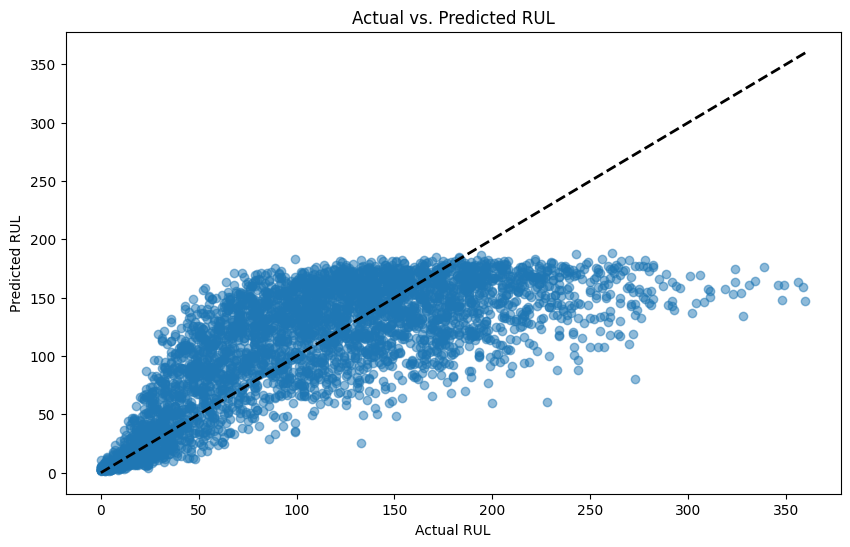

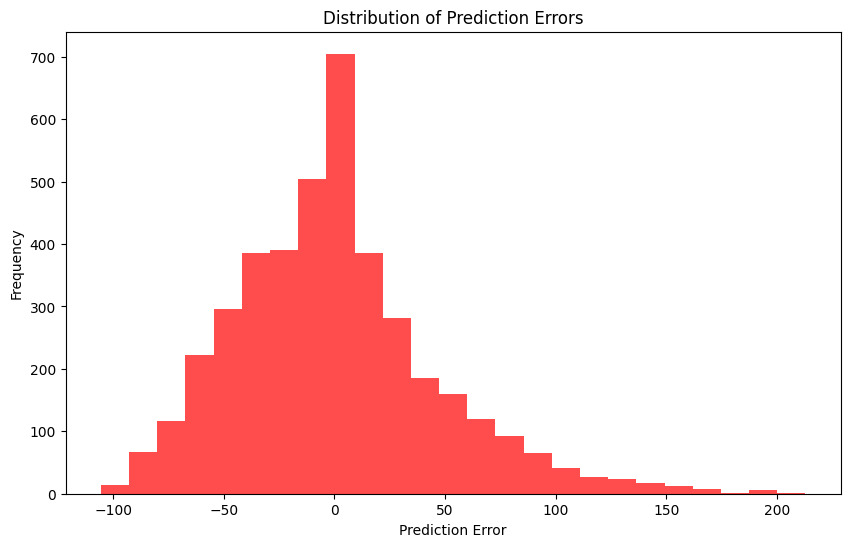

In [33]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_predicted, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted RUL')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.show()

# Plotting error distribution
errors = y_val - y_val_predicted
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25, alpha=0.7, color='red')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()
